In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from math import dist
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv('Fifa 23 Players Data.csv')
data

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,50,44,50,41,38,41,40,36,40,15
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,45,45,45,47,48,47,49,49,49,15
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,52,49,52,46,44,46,46,42,46,17
18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,...,33,33,33,44,42,44,47,49,47,15


In [4]:
set(data['Best Position'])

{'CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'GK',
 'LB',
 'LM',
 'LW',
 'LWB',
 'RB',
 'RM',
 'RW',
 'RWB',
 'ST'}

In [5]:
df = data.loc[:, ~data.columns.isin(['Known As', 'Full Name', 'Value(in Euro)', 
                                    'Nationality', 'Image Link', 'Club Name', 'Wage(in Euro)', 'Release Clause',
                                    'Contract Until', 'Club Jersey Number', 'On Loan', 'National Team Name',
                                    'National Team Image Link','National Team Jersey Number'
                                    ])]

cat_columns = df.select_dtypes(['object']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])

df

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Overall,Potential,Positions Played,Best Position,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Position,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,91,91,0,0,35,169,67,2190,452,0,...,91,88,91,67,66,67,62,53,62,22
1,91,91,1,1,34,185,81,2147,455,1,...,89,84,89,67,67,67,63,58,63,21
2,91,91,2,2,33,185,81,2205,458,2,...,86,83,86,67,69,67,64,63,64,22
3,91,91,3,3,31,181,70,2303,483,3,...,91,91,91,82,82,82,78,72,78,24
4,91,95,4,2,23,182,73,2177,470,2,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,47,56,135,0,21,174,68,1287,274,13,...,50,44,50,41,38,41,40,36,40,15
18535,47,57,9,8,17,175,60,1289,267,5,...,45,45,45,47,48,47,49,49,49,15
18536,47,67,15,11,18,170,65,1333,277,5,...,52,49,52,46,44,46,46,42,46,17
18537,47,61,6,6,17,178,65,1113,226,5,...,33,33,33,44,42,44,47,49,47,15


In [6]:
df_scaled = StandardScaler().fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled

,Overall,Potential,Positions Played,Best Position,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Position,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,3.704674,3.226918,-0.605185,-1.502873,2.068570,-1.830125,-1.165469,2.152221,2.373466,-1.801749,...,2.327109,2.325283,2.327109,0.770918,0.726034,0.770918,0.448458,-0.103651,0.448458,-0.083207
1,3.704674,3.226918,-0.596338,-1.246385,1.856618,0.502946,0.830709,1.994800,2.449171,-1.549223,...,2.184117,2.021581,2.184117,0.770918,0.798123,0.770918,0.519084,0.235481,0.519084,-0.149395
2,3.704674,3.226918,-0.587491,-0.989897,1.644665,0.502946,0.830709,2.207136,2.524877,-1.296697,...,1.969628,1.945656,1.969628,0.770918,0.942300,0.770918,0.589710,0.574612,0.589710,-0.083207
3,3.704674,3.226918,-0.578644,-0.733409,1.220760,-0.080322,-0.737716,2.565909,3.155757,-1.044171,...,2.327109,2.553059,2.327109,1.849786,1.879452,1.849786,1.578474,1.185050,1.578474,0.049169
4,3.704674,3.872840,-0.569797,-0.989897,-0.474861,0.065495,-0.309964,2.104629,2.827699,-1.296697,...,2.398605,2.021581,2.398605,0.986692,0.726034,0.986692,0.730962,0.167654,0.730962,-0.149395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,-2.777191,-2.424899,0.589185,-1.502873,-0.898767,-1.101041,-1.022885,-1.153620,-2.118400,1.481089,...,-0.604238,-1.015431,-0.604238,-1.099120,-1.292447,-1.099120,-1.105315,-1.256699,-1.105315,-0.546522
18535,-2.777191,-2.263418,-0.525561,0.549030,-1.746577,-0.955224,-2.163558,-1.146298,-2.295046,-0.539119,...,-0.961719,-0.939506,-0.961719,-0.667573,-0.571561,-0.667573,-0.469681,-0.374957,-0.469681,-0.546522
18536,-2.777191,-0.648613,-0.472477,1.318493,-1.534624,-1.684308,-1.450637,-0.985216,-2.042694,-0.539119,...,-0.461245,-0.635804,-0.461245,-0.739497,-0.859915,-0.739497,-0.681559,-0.849741,-0.681559,-0.414146
18537,-2.777191,-1.617496,-0.552102,0.036054,-1.746577,-0.517773,-1.450637,-1.790626,-3.329689,-0.539119,...,-1.819674,-1.850609,-1.819674,-0.883346,-1.004092,-0.883346,-0.610933,-0.374957,-0.610933,-0.546522


In [7]:
pca = PCA(n_components = 2)
pca.fit(df_scaled)
pca_df = pca.transform(df_scaled)
pca_df = pd.DataFrame(pca_df, columns=['PC1','PC2'])
pca_df

,PC1,PC2
0,-12.458814,-8.247721
1,-11.607076,-5.795914
2,-11.761021,-5.402074
3,-13.846215,-3.703208
4,-12.547919,-7.338780
...,...,...
18534,4.402338,-2.540969
18535,4.887949,1.430784
18536,3.446410,-1.072474
18537,8.716212,3.855305


In [18]:
y = df.loc[:, df.columns == 'Best Position']
print(y)
y = y.values.flatten()

       Best Position
0                  0
1                  1
2                  2
3                  3
4                  2
...              ...
18534              0
18535              8
18536             11
18537              6
18538             10

[18539 rows x 1 columns]


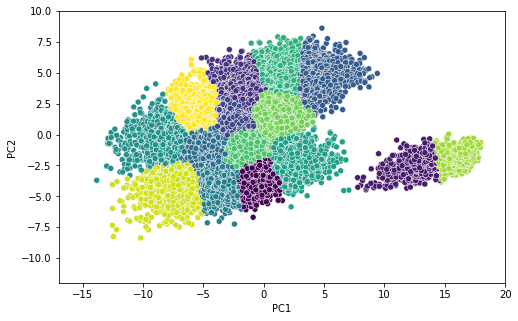

In [29]:
kmeans = KMeans(n_clusters = 15)
y_pred = kmeans.fit_predict(pca_df)

plt.figure(figsize=(8, 5))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', c = kmeans.labels_)
plt.xlim(-17, 20)                
plt.ylim(-12, 10) 
plt.show()

In [10]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y, y_pred)
print(acc)

0.0657532768757754


In [20]:
ts = []
for i in range(16):
  t = 0
  for j in range(len(y)):
    if y[j] == i and y_pred[j] == i:
      t += 1
  ts.append(t/len(y))
print(ts)

[0.002589136415124872, 0.0, 0.030692054587626087, 0.0, 0.0008091051297265225, 0.0, 0.0, 0.0, 0.0, 0.00469280975241383, 0.0022115540212524947, 0.012675980365715519, 0.009871082582663573, 0.0005394034198176816, 0.001672150601434813, 0.0]


We have the highest accuracy for position 2 which is ST